# Performance Metrics in Machine Learning

Reference: https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide

# Regression

Regression models have continuous output. So, we need a metric based on calculating some sort of distance between predicted and ground truth. In order to evaluate Regression models, we’ll discuss these metrics in detail:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R² (R-Squared)

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - lower status of the population
- MEDV - Median value of owner-occupied homes in 1000 dollars

In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='object')

In [5]:
column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = data.loc[:,column_sels]
y = data['MEDV']
min_max_scaler = preprocessing.MinMaxScaler()
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

In [6]:
regressor = linear_model.LinearRegression()
regressor.fit(x,y)
y_hat = regressor.predict(x)

In [7]:
mse = (y-y_hat)**2

print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

MSE: 21.89 (+/- 59.14)


In [8]:
mae = np.abs(y-y_hat)

print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

MAE: 3.27 (+/- 3.35)


In [9]:
mse = (y-y_hat)**2

rmse = np.sqrt(mse.mean())

print(f"RMSE: {rmse:0.2f}")

RMSE: 4.68


In [10]:
# R^2 coefficient of determination
SE_line = sum((y-y_hat)**2)
SE_mean = sum((y-y.mean())**2)

r2 = 1-(SE_line/SE_mean)

print(f"R^2 coefficient of determination: {r2*100:0.2f}%")

R^2 coefficient of determination: 74.06%


# Classification

Classification models have discrete output, so we need a metric that compares discrete classes in some form. Classification Metrics evaluate a model’s performance and tell you how good or bad the classification is, but each of them evaluates it in a different way. So in order to evaluate Classification models, we’ll discuss these metrics in detail:

- Accuracy
- Confusion Matrix (not a metric but fundamental to others)
- Precision and Recal
- F1-score
- AU-ROC

In [11]:
df = pd.read_csv('data/breast-cancer-wisconsin.data')
df.columns = [ 'code_number', 'Clump_Thickness','Uniformity_of_Cell_Size' ,'Uniformity_of_Cell_Shape', 'Marginal_Adhesion' ,            
               'Single_Epithelial_Cell_Size',  'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli' ,'Mitoses','Class']
df.head()

,code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [12]:
df.dtypes

code_number                     int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [13]:
df = df.replace('?', np.nan)

In [14]:
df.dropna(inplace=True)

In [15]:
df.Class = df.Class.map({2: 0, 4:1})

<Axes: xlabel='Class'>

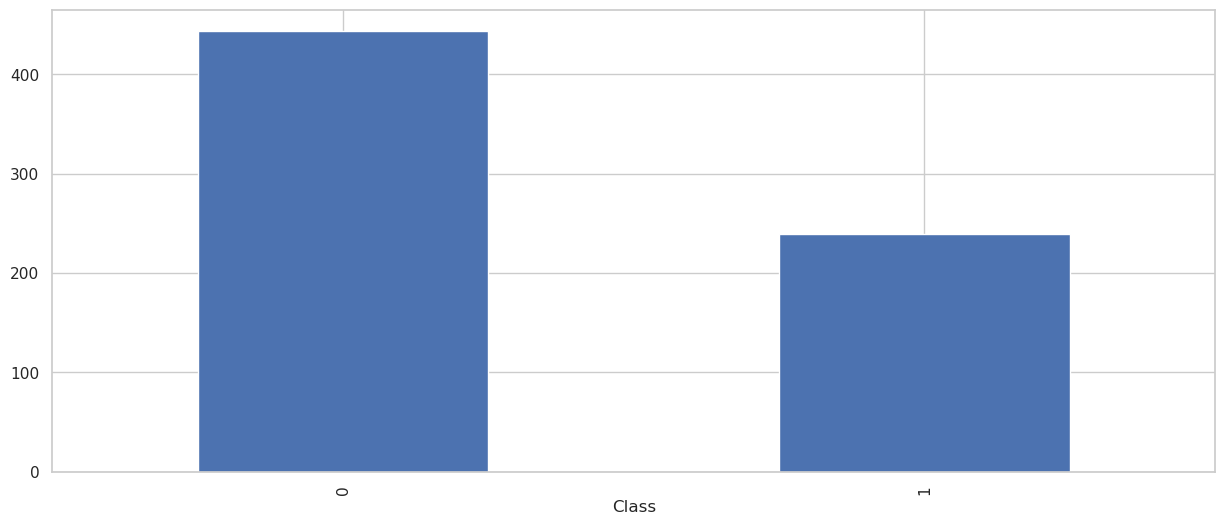

In [16]:
df.Class.value_counts().plot.bar()

In [17]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (precision_score,
                            accuracy_score)
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['code_number','Class'],axis=1).values
y = df.Class.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
df.Class.unique()

array([0, 1])

## Accuracy

In [21]:
clf_svc = SVC(C=1.0,
                kernel='rbf',
                degree=3,
                gamma='scale',
                coef0=0.0,
                shrinking=True,
                probability=False,
                tol=0.001,
                cache_size=200,
                class_weight=None,
                verbose=False,
                max_iter=-1,
                decision_function_shape='ovr',
                break_ties=False,
                random_state=None)

In [22]:
clf_svc.fit(X_train,y_train)

SVC()

In [23]:
y_hat = clf_svc.predict(X_test)

In [24]:
print(f'Accuracy Score is {accuracy_score(y_test,y_hat)}')

Accuracy Score is 0.9635036496350365


In [25]:
clf_1 = LogisticRegression(C=1.0, class_weight={0:100,1:0.2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
clf_2 = LogisticRegression(C=1.0, class_weight={0:0.001,1:90000}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
clf_2.fit(X,y)

LogisticRegression(class_weight={0: 0.001, 1: 90000}, multi_class='auto')

Calculate precision and recall and plot the tradeoff and how to increase both of them one-by-one

In [28]:
from sklearn.metrics import precision_score

In [29]:
y_hat = clf_2.predict(X)

In [30]:
# precision tp / (tp + fp)
precision = precision_score(y, y_hat)
print('Precision: %f' % precision)

Precision: 0.350440


In [31]:
from sklearn.metrics import recall_score

In [32]:
# recall: tp / (tp + fn)
recall = recall_score(y, y_hat)
print('Recall: %f' % recall)

Recall: 1.000000


In [33]:
def find_TP(y, y_hat):
    # counts the number of true positives (y = 1, y_hat = 1)
    return sum((y == 1) & (y_hat == 1))
def find_FP(y, y_hat):
    # counts the number of false negatives (y = 1, y_hat = 0)
    return sum((y == 1) & (y_hat == 0))
def find_FN(y, y_hat):
    # counts the number of false positives (y = 0, y_hat = 1)
    return sum((y == 0) & (y_hat == 1))
def find_TN(y, y_hat):
    # counts the number of true negatives (y = 0, y_hat = 0)
    return sum((y == 0) & (y_hat == 0))

In [34]:
print('TP:',find_TP(y, y_hat))
print('FN:',find_FN(y, y_hat))
print('FP:',find_FP(y, y_hat))
print('TN:',find_TN(y, y_hat))

TP: 239
FN: 443
FP: 0
TN: 0


In [35]:
TP = find_TP(y, y_hat)
FN = find_FN(y, y_hat)
FP = find_FP(y, y_hat)
TN = find_TN(y, y_hat)

In [36]:
precision = TP/(TP+FP)
print('Precision:',precision)

Precision: 1.0


In [37]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt
#from sklearn.metrics import plot_precision_recall_curve

In [38]:
#disp = plot_precision_recall_curve(clf_2, X, y)
#disp.ax_.set_title('2-class Precision-Recall curve: '
#                   'AP={0:0.2f}'.format(precision))

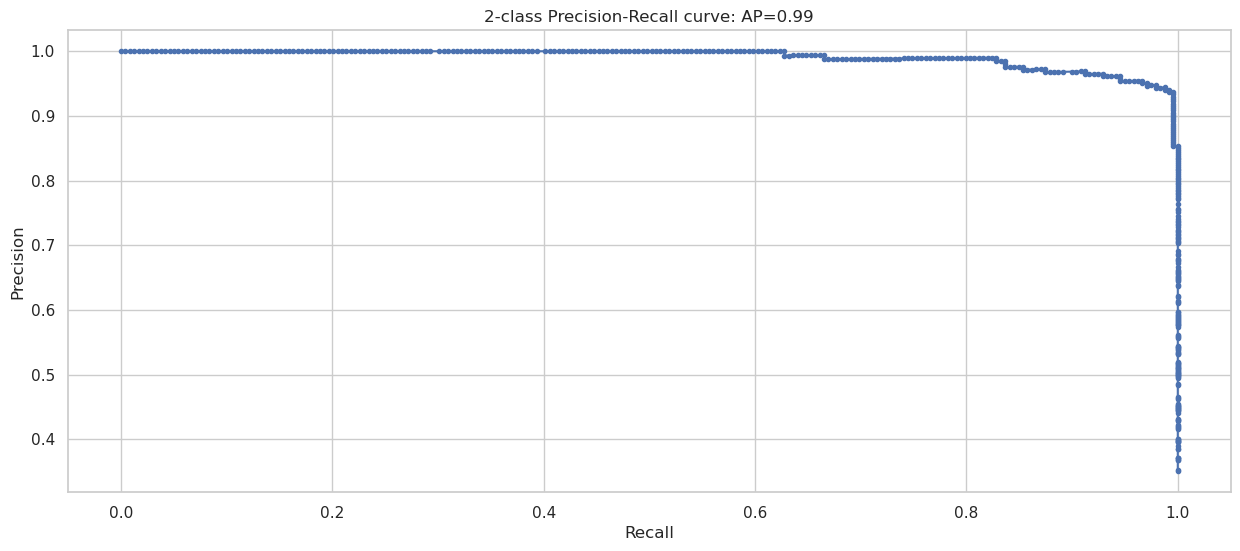

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming clf_2 is your trained classifier and X, y are your data
y_scores = clf_2.predict_proba(X)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y, y_scores)

# Calculate average precision score
average_precision = average_precision_score(y, y_scores)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [40]:
#from sklearn.metrics import f1_score

In [41]:
#f1score = 2*((precision*recall)/(precision+recall))
#print('F1 score: %f' % f1score)

In [42]:
# f1: 2 tp / (2 tp + fp + fn)
#f1 = f1_score(y, y_hat)
#print('F1 score: %f' % f1)

Max F1 score from Precision-Recall curve: 0.965517
F1 score from predictions: 0.519001


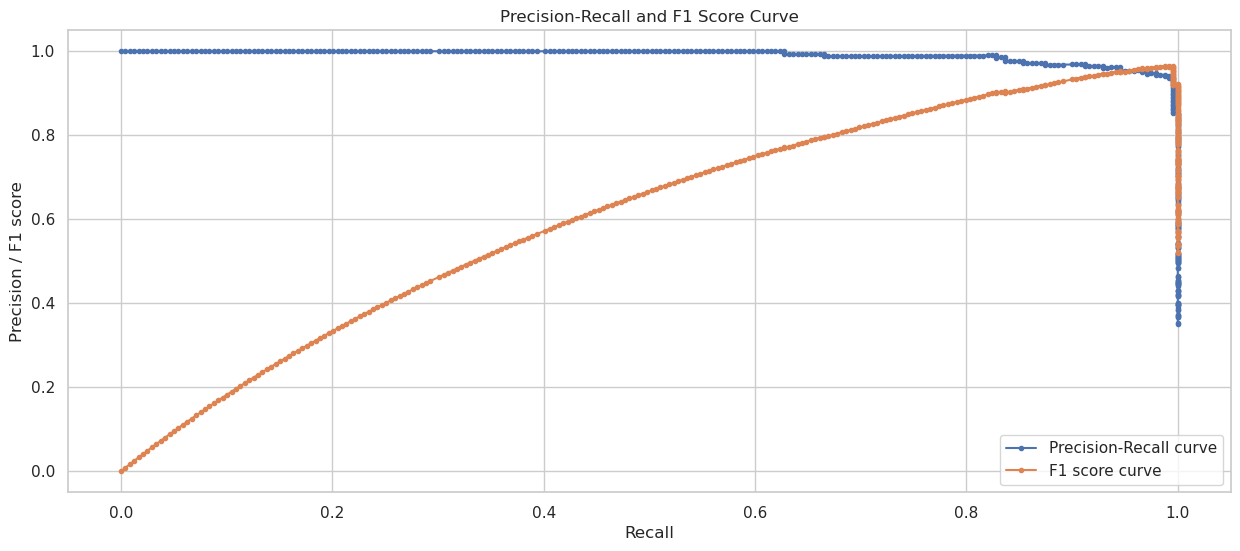

In [43]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Assuming clf_2 is your trained classifier
# and X, y are your data and true labels respectively
y_hat = clf_2.predict(X)
y_scores = clf_2.decision_function(X)
precision, recall, _ = precision_recall_curve(y, y_scores)

# Calculate F1 scores for Precision-Recall curve
f1_scores = 2 * (precision * recall) / (precision + recall)

# Print the maximum F1 score from the Precision-Recall curve
max_f1_score = max(f1_scores)
print('Max F1 score from Precision-Recall curve: %f' % max_f1_score)

# Calculate the F1 score based on classifier's predictions
f1 = f1_score(y, y_hat)
print('F1 score from predictions: %f' % f1)

# Plot Precision-Recall and F1 score curves
plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.plot(recall, f1_scores, marker='.', label='F1 score curve')
plt.xlabel('Recall')
plt.ylabel('Precision / F1 score')
plt.title('Precision-Recall and F1 Score Curve')
plt.legend()
plt.show()


In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.996


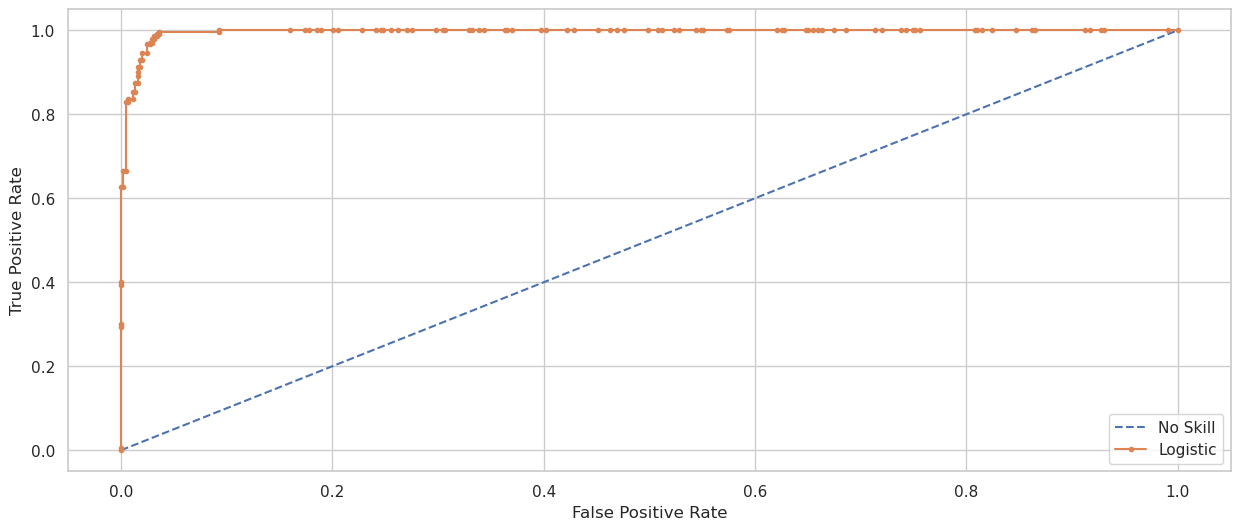

In [45]:
ns_probs = [0 for _ in range(len(y))]
# predict probabilities
lr_probs = clf_2.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

In [46]:
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print('TPR: ',TPR)
print('FPR: ',FPR)

TPR:  0.35043988269794724
FPR:  nan


In [47]:
lr_probs.shape

(682,)